#MENTORAMA - MODULO 11 - Training models



###1: Linear regression and normal equation

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
def random_data(sample_size=100):
  X = 2 * np.random.rand(sample_size, 1)
  y = 4 + 3 * X + np.random.randn(sample_size, 1)
  return X, y



In [31]:
X, y = random_data(500)
X.shape, y.shape


((500, 1), (500, 1))

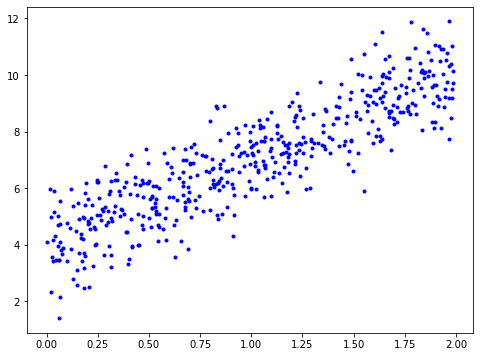

In [32]:
plt.figure(figsize=[8,6])
plt.plot(X, y, "b.")
plt.show()

In [39]:
# Finding the theta best manually

def normal_lin_reg(X, y):
  X = np.c_[np.ones((X.shape[0], 1)), X]
  X_transposed = X.T
  XTX = X_transposed.dot(X)
  inverted = np.linalg.inv(XTX)
  theta_best = inverted.dot(X_transposed).dot(y)

  return theta_best

In [47]:
theta_best = normal_lin_reg(X, y)
theta_best

array([[3.97156061],
       [3.06641854]])

In [49]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.97156061],
       [10.1043977 ]])

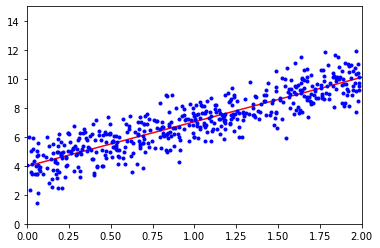

In [51]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [41]:
# Sklearn function to get theta best 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lin_reg.intercept_, lin_reg.coef_

(array([3.97156061]), array([[3.06641854]]))

In [44]:
y_pred = lin_reg.predict(X_new)
y_pred

array([[ 3.97156061],
       [10.1043977 ]])

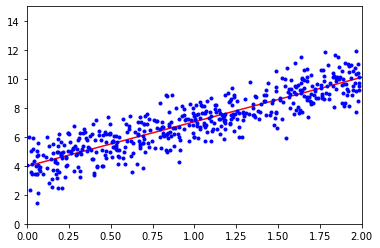

In [54]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()